# Demetropolus et al. (1998) : Compression-Tension and Bending


- Performed by: Yash Niranjan Poojary
- Reviewed by:
- Last modified : 28th december 2023
- SAFER HBM Version: ![Static Badge](https://img.shields.io/badge/SAFER_HBM-11.0-1?style=flat&logoColor=blue&labelColor=whitw&color=blue)
- LSDYNA version:  `mpp d R12.2.1 `

## Experiment by Demetropolus et al. (1998)
The simulated outputs are compared to the references from PMHS tests reported by Demetropolus et al.  <sup>[1]</sup>
1.	Demetropoulos CK, Yang KH, Grimm MJ, Khalil TB, King AI. Mechanical properties of the cadaveric and Hybrid III lumbar spines. SAE transactions. 1998:2862-71.

<!-- ![](../_env/setup_demotropoulos_S11.png)  -->
```{figure} ../_env/setup_demotropoulos_S11.png
---
align: center
---
Setup for T12- L5
```

## Summary of the experiment
- `Coordinate system `    : aligned with Global in simulations
- `Load case`    :  The whole lumbar spine (T12-L5) subjected to component level compression, tension, anterior shear, posterior shear, lateral shear, extension, flexion, lateral bending.
- 10 cadaveric specimens (8 males: 2 females) with an average stature of 173 cm, an average weight of 73 kg and an average age of 60 years were tested to establish  dynamic mechanical properties of the whole cadaveric lumbar spine.
- All tests in this study were non-injurious

### Information on the subjects/specimens

| **Specimen Number** | **Sex** | **Age [years]** | **Weight [kg]** | **stature [cm]** | **specimen height [cm]** |
| :-----------------: | :-----: | :-------------: | :--------------: | :--------------: | :----------------------: |
|         63          |  Male   |       64        |        49        |       173        |            18            |
|         202         |  Male   |       65        |        95        |       183        |            19            |
|         330         | Female  |       54        |        55        |       165        |            17            |
|         443         |  Male   |       54        |       103        |       176        |            18            |
|         503         |  Male   |       65        |        93        |       180        |            17            |
|         582         |  Male   |       66        |        55        |       172        |            18            |
|         715         |  Male   |       59        |        59        |       165        |            18            |
|         846         | Female  |       59        |        76        |       169        |            16            |
|         887         |  Male   |       54        |        77        |       172        |            16            |
|         894         |  Male   |       61        |        76        |       177        |            17            |
|     **Average**     |         |     **60**      |      **73**      |     **173**      |          **17**          |

### Loading and Boundary Conditions
- Each specimen was tested in the following load casees anterior shear, posterior shear, lateral shear, flexion, extension, lateral bending, compression and tension
- The T12 vertebrae were constrained in epoxy, rigidly attached to the test fixture. 
- At the inferior end, L5 was also potted in epoxy. 
- The potting material was connected to the spine using `*CONSTRAINT_SHELL_IN_SOLID_PENALTY`. 
- The loading stratergy followed for bending tests was different compared to the others.
    - **For Shear and compression-tension setup**
        - The superior potting was fixed in all DOFs.
        - The inferior potting was fixed in all DOFs other than the loading direction.
        - Load was applied to the rigid base of the inferior potting using `*BOUNDARY_PRESCRIBED_MOTION_RIGID` with a constant velocity od `0.1 m/s` as reported in the test [1].
    - **For bending setup**
        - Superior potting free to move in all dof’s and constrained by a cable of length ~800 mm with a fixed end.
        - The inferior potting was fixed in all DOFs other than the loading direction.
        - Load was applied to the rigid base of the inferior potting using `*BOUNDARY_PRESCRIBED_MOTION_RIGID` with a constant velocity od `0.1 m/s` as reported in the test [1].
- The  maximum displacemet of the potting was based on the maximum non-injurious diaplcement reported in the litrature.
    - Compression upto 6.5 mm 
    - Tension upto 2.5 mm
    - Anterior-posterior shear upto 35 mm 
    - lateral shear upto 13 mm 
    - flexion upto 50.8mm
    - extension upto 50.8 mm
    - lateral bending upto 38.1 mm
#### Assumptions
- From the litrature it was estimated that the spine was in a neutral (or lordotic) position.
- So, the “LUMB_FLEX” parameter in the SHBM lumbar spine was set to `-1`

#### Modelling in dyna
##### submodel preparation
- Vertebrae level from T12 to L5 is extracted from the model.
- The bony, ligamentous and cartilaginous structures of the specimens were retained for testing.
- All the muscles elements are removed. 

##### Potting
- Both ends of each specimen were potted in a section of PVC tubing with a 50.8 mm length, 101.6 mm inner diameter and filled with using epoxy.
- This was modeeled using `MAT_ELASTIC` potting material with $E=2Gpa$ and the based modelled with `MAT_RIGID` to prescribe the loads and constraint.
- The potting did not impede the motion at the discs of the corresponding potted levels.

### Responses recorded
- Reaction force, moments and displacements of the potting.
- The reference values from the paper were digitalised [2]  and are incuded in the notebook. The data corresponds to the unnormalised corridors.

### Other references
2.	Drevon D, Fursa SR, Malcolm AL. Intercoder reliability and validity of WebPlotDigitizer in extracting graphed data. Behavior modification. 2017;41(2):323-39. 
3.	Iraeus J, Poojary YN, Jaber L, John J, Davidsson J.[ A new open-source finite element lumbar spine model, its tuning and validation, and development of a tissue-based injury risk function for compression fractures](http://www.ircobi.org/wordpress/downloads/irc23/pdf-files/23132.pdf). Nucleus. 2023;3:4.

The reference values from the paper were digitalised and are incuded in the notebook. The data corresponds to the unnormalised corridors.



In [1]:
import os
import glob
# for data analysis
import pandas as pd
import numpy as np
import math as mt
# packages for plotting
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Plot formats
sns.set()
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1)
s11 = {"linestyle" :'-', "color" : 'b',"alpha" :1,"linewidth":2}
pmhs = {"linestyle" :'--', "color" : 'k',"alpha" :0.7,"linewidth":1}
pmhsM = {"linestyle" :'--', "color" : 'b',"alpha" :0.7,"linewidth":1}
pmhsF = {"linestyle" :'--', "color" : 'r',"alpha" : 0.7,"linewidth":1}
Test_avg = {"linestyle" :'-', "color" : 'k',"alpha" :1,"linewidth":1, 'marker' :"o", 'markevery': 75}
test_corr = {"color": 'silver',"alpha" : 0.7,'linewidth':0.0}
Test_avg_norm = {"linestyle" :'-', "color" : 'k',"alpha" :1,"linewidth":1, 'marker' :"o", 'markevery': 75,'mfc': 'seagreen','mec': 'seagreen'}

# Dataframe formats
def select_col(x):
    mask = x['Overall Score'] <0.5
    df1 =  pd.DataFrame('', index=x.index, columns=x.columns)
    df1.loc[mask,'Overall Score'] = 'color:crimson;font-weight:bold;'
    return df1
heading = [dict(selector="caption",
            props=[("text-align", "center"),
                   ("font-size", "150%"),
                   ("font-weight", "bold")])]
content={'text-align': 'center'}

In [3]:
Tests=['compression','tension','anterior_shear','posterior_shear','lateral_shear','extension','flexion','lateral_bending']
figures_dir = "../data/processed/SAFER11.0/figures/"
processed_data_dir = f"../data/processed/SAFER11.0"
experiment_dir= "../data/experiment_data/"
binout_path_sim={}
result_output_dir={}

if not os.path.exists(processed_data_dir): 
    os.makedirs(processed_data_dir)
if not os.path.exists(figures_dir): 
    os.makedirs(figures_dir)

for test in Tests:
    binout_path_sim[test] = test
    result_output_dir[test] = os.path.join(processed_data_dir, binout_path_sim[test])
    if not os.path.exists(result_output_dir[test]): 
        os.makedirs(result_output_dir[test])

## Postprocessing with dynasaur

In [4]:
# Import the dynasaur library
from dynasaur.plugins.data_visualization_controller import DataVisualizationController

In [5]:
# Path to Dynasaur definition files

# Dynasaur object definitions
dynasaur_ids = ["../_env/post_ID.def"]

# Dynasaur calculation definitions
dynasaur_calculation_defs = [ "../_env/post_calculation.def","../../model/SAFER_11.0/postprocessing/01_energy_calculation.def"]

In [6]:
sim_output={}
exp={}
for test in Tests:
    sim = DataVisualizationController(calculation_procedure_def_file=dynasaur_calculation_defs,
                                                  object_def_file=dynasaur_ids,
                                                  data_source= binout_path_sim[test] +'/binout*')
    commands = sim.get_defined_calculation_procedures()
    print(commands)
    for command in sim.get_defined_calculation_procedures():
        sim.calculate(command)
    # export post-processed data
    sim.write_CSV(result_output_dir[test], filename="Dynasaur_output.csv")
    # Import processed data
    sim_output[test]=pd.read_csv(os.path.join(result_output_dir[test],"Dynasaur_output.csv"), delimiter=';', na_values='-', header = [0,1,2,3])
    # Import experimental data
    exp[test]=pd.read_csv(os.path.join(experiment_dir,'{}.csv'.format(test)),delimiter=';',header=[0])

[READ DYNASAUR DEF]	read ../_env/post_calculation.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing/01_energy_calculation.def
[READ DYNASAUR DEF]	done
[READ DYNASAUR DEF]	read ../_env/post_ID.def
[READ DYNASAUR DEF]	done
[READ BINOUT]	read rbdout data ...
[READ BINOUT]	done reading rbdout!
[READ BINOUT]	read bndout data ...
[READ BINOUT]	done reading bndout!
[READ BINOUT]	read glstat data ...
[READ BINOUT]	done reading glstat!
[{'visualization': 'lower_pot_displacementx', 'x_label': 'time', 'y_label': 'displacement'}, {'visualization': 'lower_pot_displacementy', 'x_label': 'time', 'y_label': 'displacement'}, {'visualization': 'lower_pot_displacementz', 'x_label': 'time', 'y_label': 'displacement'}, {'visualization': 'upper_pot_Forcex', 'x_label': 'time', 'y_label': 'force'}, {'visualization': 'upper_pot_Forcey', 'x_label': 'time', 'y_label': 'force'}, {'visualization': 'upper_pot_Forcez', 'x_label': 'time', 'y_label': 'force'}, {'visualization': 'bending_RotationX', 'x

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: upper_pot_Forcey
[DATA]	read id 22 from channel name: y_force
[CALCULATION]	Calculating Visualization: upper_pot_Forcez
[DATA]	read id 22 from channel name: z_force
[CALCULATION]	Calculating Visualization: bending_RotationX
[DATA]	read id 22 from channel name: global_rdx
[CALCULATION]	Calculating Visualization: bending_RotationY
[DATA]	read id 22 from channel name: global_rdy
[CALCULATION]	Calculating Visualization: bending_RotationZ
[DATA]	read id 22 from channel name: global_rdz
[CALCULATION]	Calculating Visualization: bending_Momentx
[DATA]	read id 12 from channel name: xmoment
[CALCULATION]	Calculating Visualization: bending_Momenty
[DATA]	read id 12 from channel name: ymoment
[CALCULATION]	Calculating Visualization: bending_Momentz
[DATA]	read id 12 from channel name: zmoment
[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: upper_pot_Forcey
[DATA]	read id 22 from channel name: y_force
[CALCULATION]	Calculating Visualization: upper_pot_Forcez
[DATA]	read id 22 from channel name: z_force
[CALCULATION]	Calculating Visualization: bending_RotationX
[DATA]	read id 22 from channel name: global_rdx
[CALCULATION]	Calculating Visualization: bending_RotationY
[DATA]	read id 22 from channel name: global_rdy
[CALCULATION]	Calculating Visualization: bending_RotationZ
[DATA]	read id 22 from channel name: global_rdz
[CALCULATION]	Calculating Visualization: bending_Momentx
[DATA]	read id 12 from channel name: xmoment
[CALCULATION]	Calculating Visualization: bending_Momenty
[DATA]	read id 12 from channel name: ymoment
[CALCULATION]	Calculating Visualization: bending_Momentz
[DATA]	read id 12 from channel name: zmoment
[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: upper_pot_Forcey
[DATA]	read id 22 from channel name: y_force
[CALCULATION]	Calculating Visualization: upper_pot_Forcez
[DATA]	read id 22 from channel name: z_force
[CALCULATION]	Calculating Visualization: bending_RotationX
[DATA]	read id 22 from channel name: global_rdx
[CALCULATION]	Calculating Visualization: bending_RotationY
[DATA]	read id 22 from channel name: global_rdy
[CALCULATION]	Calculating Visualization: bending_RotationZ
[DATA]	read id 22 from channel name: global_rdz
[CALCULATION]	Calculating Visualization: bending_Momentx
[DATA]	read id 12 from channel name: xmoment
[CALCULATION]	Calculating Visualization: bending_Momenty
[DATA]	read id 12 from channel name: ymoment
[CALCULATION]	Calculating Visualization: bending_Momentz
[DATA]	read id 12 from channel name: zmoment
[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: upper_pot_Forcey
[DATA]	read id 22 from channel name: y_force
[CALCULATION]	Calculating Visualization: upper_pot_Forcez
[DATA]	read id 22 from channel name: z_force
[CALCULATION]	Calculating Visualization: bending_RotationX
[DATA]	read id 22 from channel name: global_rdx
[CALCULATION]	Calculating Visualization: bending_RotationY
[DATA]	read id 22 from channel name: global_rdy
[CALCULATION]	Calculating Visualization: bending_RotationZ
[DATA]	read id 22 from channel name: global_rdz
[CALCULATION]	Calculating Visualization: bending_Momentx
[DATA]	read id 12 from channel name: xmoment
[CALCULATION]	Calculating Visualization: bending_Momenty
[DATA]	read id 12 from channel name: ymoment
[CALCULATION]	Calculating Visualization: bending_Momentz
[DATA]	read id 12 from channel name: zmoment
[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: upper_pot_Forcey
[DATA]	read id 22 from channel name: y_force
[CALCULATION]	Calculating Visualization: upper_pot_Forcez
[DATA]	read id 22 from channel name: z_force
[CALCULATION]	Calculating Visualization: bending_RotationX
[DATA]	read id 22 from channel name: global_rdx
[CALCULATION]	Calculating Visualization: bending_RotationY
[DATA]	read id 22 from channel name: global_rdy
[CALCULATION]	Calculating Visualization: bending_RotationZ
[DATA]	read id 22 from channel name: global_rdz
[CALCULATION]	Calculating Visualization: bending_Momentx
[DATA]	read id 12 from channel name: xmoment
[CALCULATION]	Calculating Visualization: bending_Momenty
[DATA]	read id 12 from channel name: ymoment
[CALCULATION]	Calculating Visualization: bending_Momentz
[DATA]	read id 12 from channel name: zmoment
[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: bending_RotationY
[DATA]	read id 22 from channel name: global_rdy
[CALCULATION]	Calculating Visualization: bending_RotationZ
[DATA]	read id 22 from channel name: global_rdz
[CALCULATION]	Calculating Visualization: bending_Momentx
[DATA]	read id 12 from channel name: xmoment
[CALCULATION]	Calculating Visualization: bending_Momenty
[DATA]	read id 12 from channel name: ymoment
[CALCULATION]	Calculating Visualization: bending_Momentz
[DATA]	read id 12 from channel name: zmoment
[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[C

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: bending_RotationY
[DATA]	read id 22 from channel name: global_rdy
[CALCULATION]	Calculating Visualization: bending_RotationZ
[DATA]	read id 22 from channel name: global_rdz
[CALCULATION]	Calculating Visualization: bending_Momentx
[DATA]	read id 12 from channel name: xmoment
[CALCULATION]	Calculating Visualization: bending_Momenty
[DATA]	read id 12 from channel name: ymoment
[CALCULATION]	Calculating Visualization: bending_Momentz
[DATA]	read id 12 from channel name: zmoment
[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[C

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: bending_RotationY
[DATA]	read id 22 from channel name: global_rdy
[CALCULATION]	Calculating Visualization: bending_RotationZ
[DATA]	read id 22 from channel name: global_rdz
[CALCULATION]	Calculating Visualization: bending_Momentx
[DATA]	read id 12 from channel name: xmoment
[CALCULATION]	Calculating Visualization: bending_Momenty
[DATA]	read id 12 from channel name: ymoment
[CALCULATION]	Calculating Visualization: bending_Momentz
[DATA]	read id 12 from channel name: zmoment
[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[C

## Stiffness plots:  
### compression, tension, anterior shear, posterior shear and lateral shear

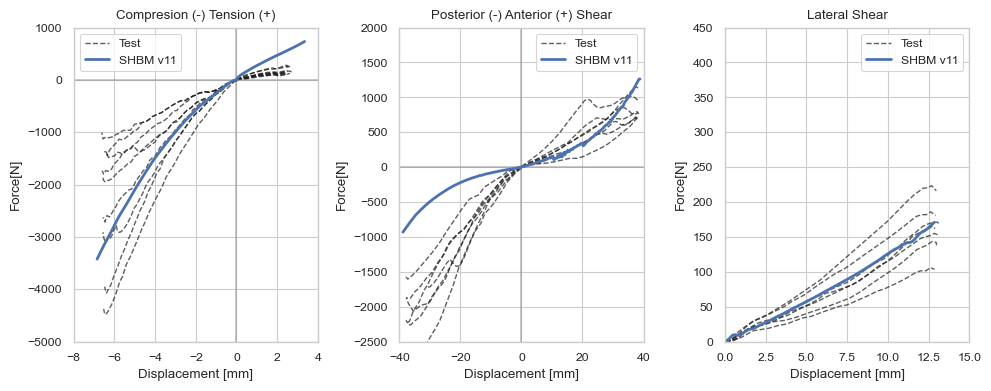

In [15]:
fig_L12, ax = plt.subplots(nrows=1, ncols=3,figsize=(10, 4))
# --------------------------------------------------------------Compresion-Tension--------------------------------------------------------------
ax[0].plot(-pd.DataFrame(exp['compression'].D1) ,-pd.DataFrame(exp['compression'].F1),**pmhs,label='Test')
ax[0].plot(-pd.DataFrame(exp['compression'].loc[:,'D2':'F9':2]) ,-pd.DataFrame(exp['compression'].loc[:,'F2':'F9':2]),**pmhs)
ax[0].plot(pd.DataFrame(exp['tension'].loc[:,'D1':'F9':2]) ,pd.DataFrame(exp['tension'].loc[:,'F1':'F9':2]),**pmhs)
ax[0].set(xlim=[-8,4],ylim=[-5000,1000],xlabel='Displacement [mm]',title='Compresion (-) Tension (+)',ylabel='Force[N]');
ax[0].axhline(y=0, color='gray',alpha=0.5)
ax[0].axvline(x=0, color='gray',alpha=0.5)

ax[0].plot(pd.DataFrame(-sim_output['compression'].lower.pot_displacementz.displacement),-pd.DataFrame(sim_output['compression'].upper.pot_Forcez.force*1000),**s11,label='SHBM v11')
ax[0].plot(pd.DataFrame(-sim_output['tension'].lower.pot_displacementz.displacement),pd.DataFrame(sim_output['tension'].upper.pot_Forcez.force*1000)-60,**s11)

# --------------------------------------------------------------Lateral bending--------------------------------------------------------------
ax[1].plot(-exp['posterior_shear'].D1 ,-exp['posterior_shear'].F1,**pmhs,label='Test')
ax[1].plot(-exp['posterior_shear'].loc[:,'D2':'F7':2] ,-exp['posterior_shear'].loc[:,'F2':'F7':2],**pmhs)
ax[1].plot(exp['anterior_shear'].loc[:,'D1':'F7':2] ,exp['anterior_shear'].loc[:,'F1':'F7':2],**pmhs)
ax[1].set(xlim=[-40,40],ylim=[-2500,2000],xlabel='Displacement [mm]',title='Posterior (-) Anterior (+) Shear',ylabel='Force[N]');
ax[1].axhline(y=0, color='gray',alpha=0.5)
ax[1].axvline(x=0, color='gray',alpha=0.5)

ax[1].plot(pd.DataFrame(sim_output['anterior_shear'].lower.pot_displacementx.displacement)*-1,pd.DataFrame(sim_output['anterior_shear'].upper.pot_Forcex.force*1000),**s11)
ax[1].plot(-pd.DataFrame(sim_output['posterior_shear'].lower.pot_displacementx.displacement),-pd.DataFrame(sim_output['posterior_shear'].upper.pot_Forcex.force*1000),**s11,label='SHBM v11')

# --------------------------------------------------------------Axial Rotation--------------------------------------------------------------
ax[2].plot(pd.DataFrame(exp['lateral_shear'].D1) ,pd.DataFrame(exp['lateral_shear'].F1),**pmhs,label='Test')
ax[2].plot(pd.DataFrame(exp['lateral_shear'].loc[:,'D2':'F7':2]) ,pd.DataFrame(exp['lateral_shear'].loc[:,'F2':'F7':2]),**pmhs)
ax[2].set(xlim=[0,15],ylim=[0,450],xlabel='Displacement [mm]',title='Lateral Shear',ylabel='Force[N]');
ax[2].plot(pd.DataFrame(sim_output['lateral_shear'].lower.pot_displacementy.displacement),pd.DataFrame(sim_output['lateral_shear'].upper.pot_Forcey.force*1000),**s11,label='SHBM v11')
for l in range (3):
    ax[l].legend()
fig_L12.tight_layout()

### extension, flexion and lateral bending

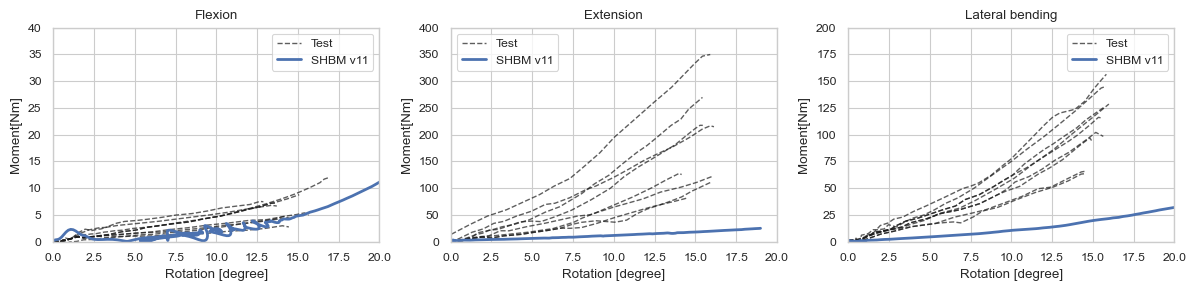

In [19]:
fig_fd, axs = plt.subplots(nrows=1, ncols=3,figsize=(12, 3))

axs[0].plot(pd.DataFrame(exp['flexion'].D1) ,pd.DataFrame(exp['flexion'].F1),**pmhs,label='Test')
axs[0].plot(pd.DataFrame(exp['flexion'].loc[:,'D2':'F9':2]) ,pd.DataFrame(exp['flexion'].loc[:,'F2':'F9':2]),**pmhs)
axs[0].plot(np.degrees(pd.DataFrame(sim_output['flexion'].bending.RotationY.Rotation)),pd.DataFrame(sim_output['flexion'].bending.Momenty.moment),**s11,label='SHBM v11')
axs[0].set(xlim=[0,20],ylim=[0,40],xlabel='Rotation [degree]',title='Flexion',ylabel='Moment[Nm]');

axs[1].plot(pd.DataFrame(exp['extension'].D1) ,pd.DataFrame(exp['extension'].F1),**pmhs,label='Test')
axs[1].plot(pd.DataFrame(exp['extension'].loc[:,'D2':'F9':2]) ,pd.DataFrame(exp['extension'].loc[:,'F2':'F9':2]),**pmhs)
axs[1].plot(np.degrees(pd.DataFrame(sim_output['extension'].bending.RotationY.Rotation)),pd.DataFrame(sim_output['extension'].bending.Momenty.moment),**s11,label='SHBM v11')
axs[1].set(xlim=[0,20],ylim=[0,400],xlabel='Rotation [degree]',title='Extension',ylabel='Moment[Nm]');

axs[2].plot(pd.DataFrame(exp['lateral_bending'].D1) ,pd.DataFrame(exp['lateral_bending'].F1),**pmhs,label='Test')
axs[2].plot(pd.DataFrame(exp['lateral_bending'].loc[:,'D2':'F9':2]) ,pd.DataFrame(exp['lateral_bending'].loc[:,'F2':'F9':2]),**pmhs)
axs[2].plot(np.degrees(pd.DataFrame(sim_output['lateral_bending'].bending.RotationX.Rotation)),pd.DataFrame(sim_output['lateral_bending'].bending.Momentx.moment),**s11,label='SHBM v11')
axs[2].set(xlim=[0,20],ylim=[0,200],xlabel='Rotation [degree]',title='Lateral bending',ylabel='Moment[Nm]');
for l in range (3):
    axs[l].legend()
fig_fd.tight_layout()

## Energy Plots

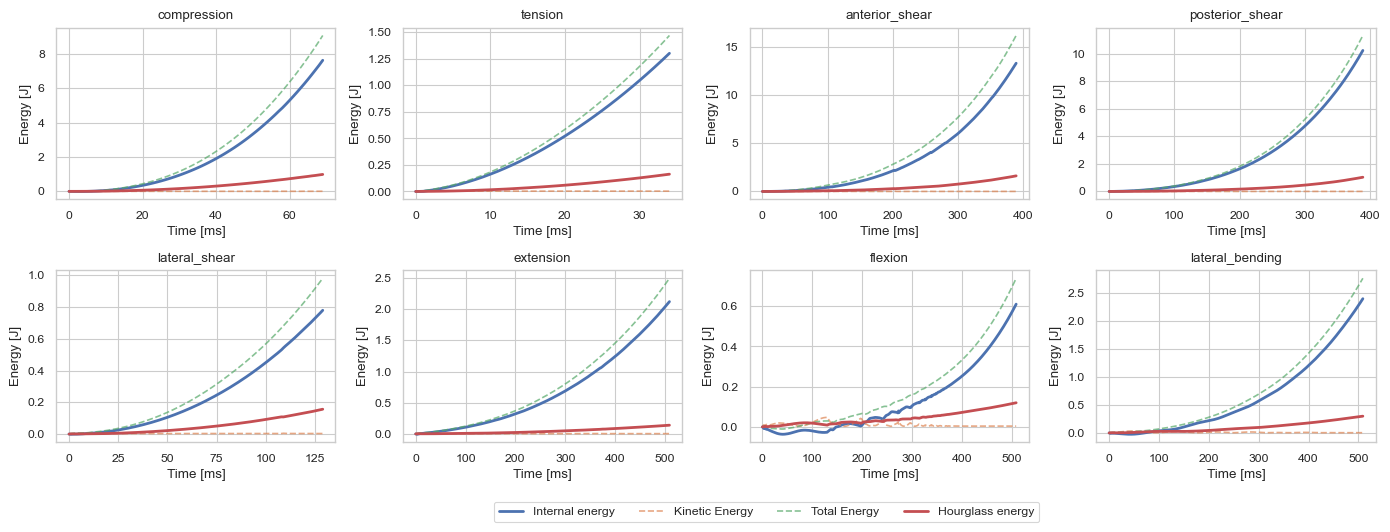

In [24]:
fig_eny, axs = plt.subplots(nrows=2, ncols=4,figsize=(14,5))
i=0
for ax in axs.flat:
    ax.plot(sim_output[Tests[i]].MODEL.Internal_Energy.time,sim_output[Tests[i]].MODEL.Internal_Energy.energy,linewidth=2)
    ax.plot(sim_output[Tests[i]].MODEL.Kinetic_Energy.time,sim_output[Tests[i]].MODEL.Kinetic_Energy.energy,linestyle='--',alpha=0.7)
    ax.plot(sim_output[Tests[i]].MODEL.Total_Energy.time,sim_output[Tests[i]].MODEL.Total_Energy.energy,linestyle='--',alpha=0.7)
    ax.plot(sim_output[Tests[i]].MODEL.Hourglass_Energy.time,sim_output[Tests[i]].MODEL.Hourglass_Energy.energy,linewidth=2)
    ax.set(title="{}".format(Tests[i]),xlabel='Time [ms]',ylabel='Energy [J]')
    i=i+1

fig_eny.legend(["Internal energy","Kinetic Energy","Total Energy","Hourglass energy"], bbox_to_anchor=(0.75,0),ncols=5);
fig_eny.tight_layout()